# Import libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('dataset.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,% of irrigation land,% of deeptubewe,population (km2),LST (0C),relative humidi,elevation,distance from river,river density,water level,ndvi,ndwi,slope,distance from road,evapotranspiration,agri dep_popu,Target
0,55.10,209.79,967.32,28.08,78.53,11,0.15,0.00,4.31,0.32,0.19,0.34,0.02,100.50,211.88,6424.00
1,54.94,216.88,969.33,28.19,78.51,13,0.11,0.00,4.33,0.28,0.15,0.92,0.02,101.30,210.29,6447.68
2,54.82,223.18,970.23,27.63,78.48,14,0.08,0.00,4.34,0.41,0.25,0.68,0.01,128.78,208.92,6493.74
3,55.93,244.27,956.82,27.69,78.36,7,0.03,0.10,4.35,0.19,0.16,0.92,0.02,76.92,207.01,6697.28
4,54.86,229.52,969.02,26.80,78.44,16,0.04,2.47,4.35,0.32,0.19,0.46,0.01,97.50,207.84,6554.59


In [4]:
df.shape

(1449, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   % of irrigation land  1449 non-null   float64
 1   % of deeptubewe       1449 non-null   float64
 2   population (km2)      1449 non-null   float64
 3   LST (0C)              1449 non-null   float64
 4   relative humidi       1449 non-null   float64
 5   elevation             1449 non-null   int64  
 6   distance from river   1449 non-null   float64
 7   river density         1449 non-null   float64
 8   water level           1449 non-null   float64
 9   ndvi                  1449 non-null   float64
 10  ndwi                  1449 non-null   float64
 11  slope                 1449 non-null   float64
 12  distance from road    1449 non-null   float64
 13  evapotranspiration    1449 non-null   float64
 14  agri dep_popu         1449 non-null   float64
 15  Target               

# Define X and Y datasets

In [6]:
x = df.drop('Target', axis=1)

In [7]:
x.head()

,% of irrigation land,% of deeptubewe,population (km2),LST (0C),relative humidi,elevation,distance from river,river density,water level,ndvi,ndwi,slope,distance from road,evapotranspiration,agri dep_popu
0,55.10,209.79,967.32,28.08,78.53,11,0.15,0.00,4.31,0.32,0.19,0.34,0.02,100.50,211.88
1,54.94,216.88,969.33,28.19,78.51,13,0.11,0.00,4.33,0.28,0.15,0.92,0.02,101.30,210.29
2,54.82,223.18,970.23,27.63,78.48,14,0.08,0.00,4.34,0.41,0.25,0.68,0.01,128.78,208.92
3,55.93,244.27,956.82,27.69,78.36,7,0.03,0.10,4.35,0.19,0.16,0.92,0.02,76.92,207.01
4,54.86,229.52,969.02,26.80,78.44,16,0.04,2.47,4.35,0.32,0.19,0.46,0.01,97.50,207.84


In [8]:
y = df['Target']

In [9]:
y.head()

0    6424.00
1    6447.68
2    6493.74
3    6697.28
4    6554.59
Name: Target, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.30, random_state= 1)

# Xgboost Built-in Feature Importance

In [11]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [12]:
xgb.feature_importances_

array([1.03314789e-02, 4.29215953e-02, 1.05558716e-01, 9.57495242e-04,
       7.55084828e-02, 6.79197133e-01, 3.39056656e-04, 7.27070903e-04,
       5.75032048e-02, 9.47188702e-04, 7.15692295e-04, 5.50842262e-04,
       1.69497146e-03, 1.89527043e-03, 2.11518873e-02], dtype=float32)

In [13]:
top = pd.Series(xgb.feature_importances_, index=x.columns)  

In [14]:
top

% of irrigation land    0.010331
% of deeptubewe         0.042922
population (km2)        0.105559
LST (0C)                0.000957
relative humidi         0.075508
elevation               0.679197
distance from river     0.000339
river density           0.000727
water level             0.057503
ndvi                    0.000947
ndwi                    0.000716
slope                   0.000551
distance from road      0.001695
evapotranspiration      0.001895
agri dep_popu           0.021152
dtype: float32

In [15]:
top1= top.sort_values()
top1

distance from river     0.000339
slope                   0.000551
ndwi                    0.000716
river density           0.000727
ndvi                    0.000947
LST (0C)                0.000957
distance from road      0.001695
evapotranspiration      0.001895
% of irrigation land    0.010331
agri dep_popu           0.021152
% of deeptubewe         0.042922
water level             0.057503
relative humidi         0.075508
population (km2)        0.105559
elevation               0.679197
dtype: float32

Text(0.5, 1.0, 'Importance of selected factors based on precipitation in Northern regions of Bangladesh')

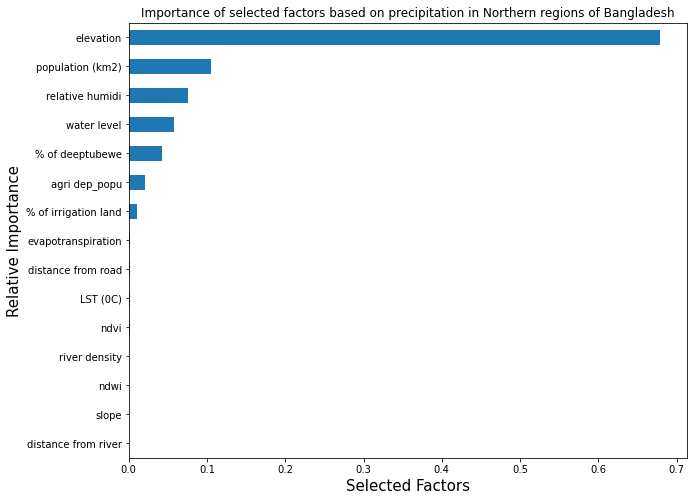

In [56]:
top1.plot(kind='barh',figsize=(10,8))
plt.xlabel("Selected Factors", size=15)
plt.ylabel("Relative Importance", size=15)
plt.title('Importance of selected factors based on precipitation in Northern regions of Bangladesh')

# Accuracy

In [17]:
xgb.score(xtest, ytest)

0.9784906856504846

# Permutation Based Feature Importance

In [18]:
perm_importance = permutation_importance(xgb, xtest, ytest)

In [19]:
top2= top1.sort_values()
top2

distance from river     0.000339
slope                   0.000551
ndwi                    0.000716
river density           0.000727
ndvi                    0.000947
LST (0C)                0.000957
distance from road      0.001695
evapotranspiration      0.001895
% of irrigation land    0.010331
agri dep_popu           0.021152
% of deeptubewe         0.042922
water level             0.057503
relative humidi         0.075508
population (km2)        0.105559
elevation               0.679197
dtype: float32

Text(0.5, 1.0, 'Relative importance of selected 19 factors based on the annual precipitation in Northern regions of Bangladesh')

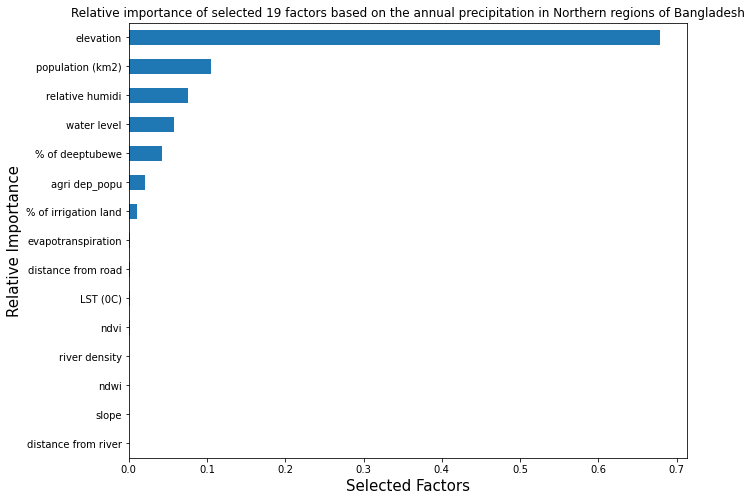

In [20]:
top2.plot(kind='barh',figsize=(10,8))
plt.xlabel("Selected Factors", size=15)
plt.ylabel("Relative Importance", size=15)
plt.title('Relative importance of selected 19 factors based on the annual precipitation in Northern regions of Bangladesh')

In [21]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(12,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();

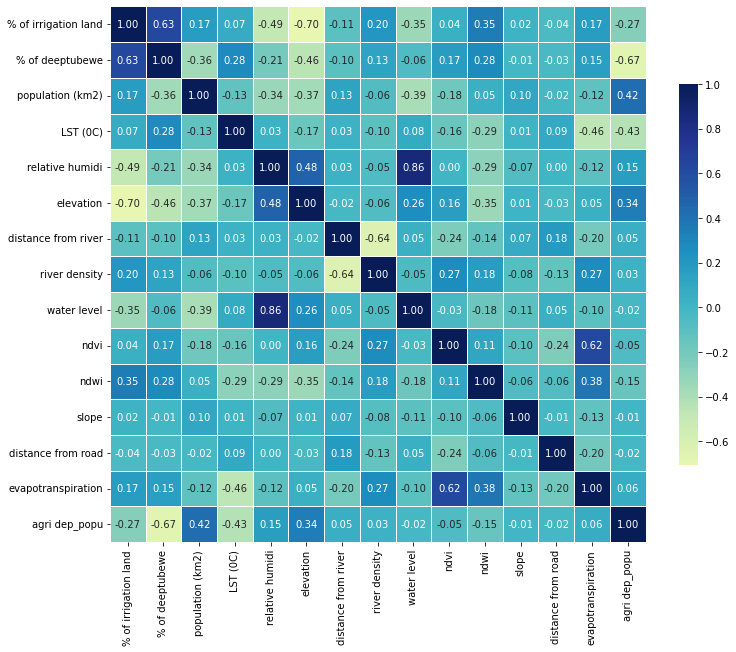

In [22]:
correlation_heatmap(xtrain)

In [23]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


# Feature Importance Computed with SHAP Values

In [24]:
import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(xtest)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


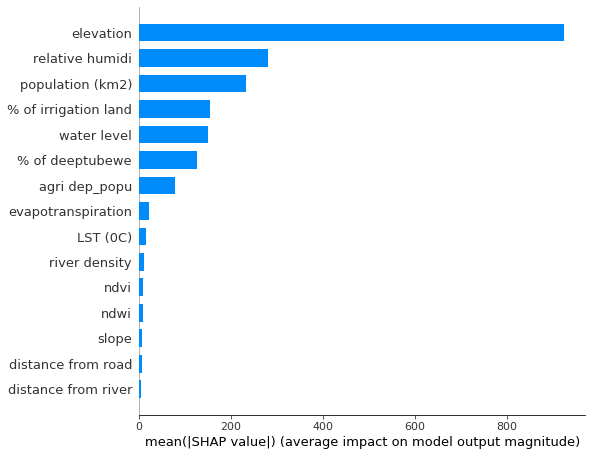

In [25]:
shap.summary_plot(shap_values, xtest, plot_type="bar")

<AxesSubplot:>

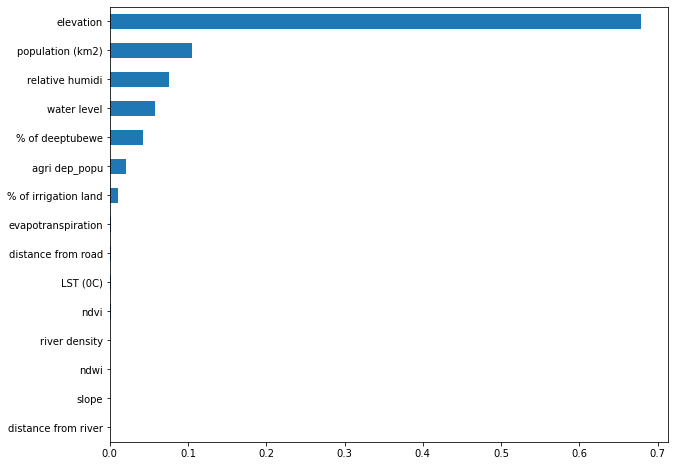

In [26]:
top2.plot(kind='barh',figsize=(10,8))

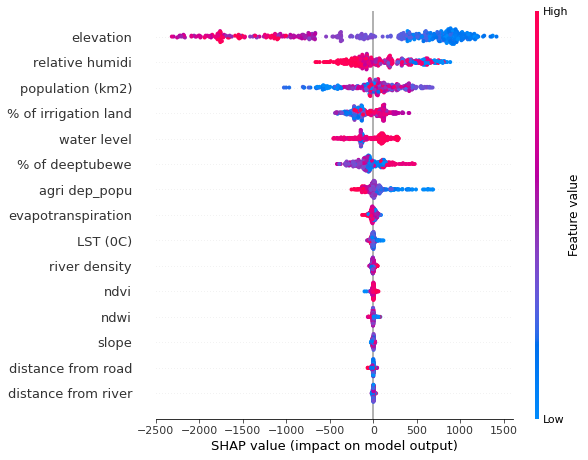

In [27]:
shap.summary_plot(shap_values, xtest)

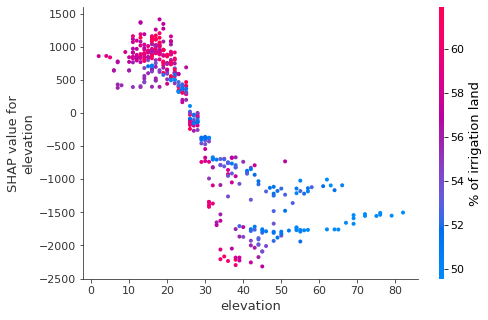

In [28]:
shap.dependence_plot("elevation", shap_values, xtest)

# Random Forest Regression Feature Importance

In [29]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [30]:
model = RandomForestRegressor()

In [31]:
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [32]:
importance = model.feature_importances_

In [33]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02682
Feature: 1, Score: 0.03653
Feature: 2, Score: 0.11606
Feature: 3, Score: 0.00339
Feature: 4, Score: 0.12003
Feature: 5, Score: 0.60796
Feature: 6, Score: 0.00064
Feature: 7, Score: 0.00190
Feature: 8, Score: 0.04095
Feature: 9, Score: 0.00104
Feature: 10, Score: 0.00069
Feature: 11, Score: 0.00074
Feature: 12, Score: 0.00087
Feature: 13, Score: 0.00158
Feature: 14, Score: 0.04080


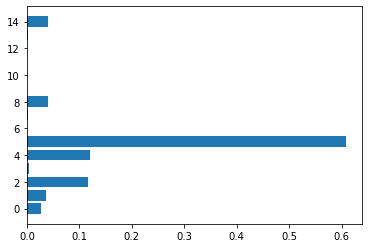

In [34]:
pyplot.barh([x for x in range(len(importance))], importance)
pyplot.show()

# Accuracy

In [35]:
model.score(xtest, ytest)

0.9663230642255238

# Boosted regression trees

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
gbr = GradientBoostingRegressor()

In [38]:
gbr.fit(xtrain, ytrain)

GradientBoostingRegressor()

In [39]:
gbr.feature_importances_

array([3.09995341e-02, 7.25243534e-02, 1.12866846e-01, 1.52712963e-03,
       1.09461163e-01, 6.06189217e-01, 1.61016571e-04, 6.97398707e-04,
       4.37917815e-02, 2.24237079e-05, 1.44164180e-04, 5.85965823e-05,
       1.44297933e-04, 1.50760793e-03, 1.99044693e-02])

In [40]:
top3 = pd.Series(gbr.feature_importances_, index=x.columns) 

In [41]:
top3

% of irrigation land    0.031000
% of deeptubewe         0.072524
population (km2)        0.112867
LST (0C)                0.001527
relative humidi         0.109461
elevation               0.606189
distance from river     0.000161
river density           0.000697
water level             0.043792
ndvi                    0.000022
ndwi                    0.000144
slope                   0.000059
distance from road      0.000144
evapotranspiration      0.001508
agri dep_popu           0.019904
dtype: float64

In [42]:
top4= top3.sort_values()
top4

ndvi                    0.000022
slope                   0.000059
ndwi                    0.000144
distance from road      0.000144
distance from river     0.000161
river density           0.000697
evapotranspiration      0.001508
LST (0C)                0.001527
agri dep_popu           0.019904
% of irrigation land    0.031000
water level             0.043792
% of deeptubewe         0.072524
relative humidi         0.109461
population (km2)        0.112867
elevation               0.606189
dtype: float64

Text(0.5, 1.0, 'Relative importance of selected 19 factors based on the annual precipitation in Northern regions of Bangladesh')

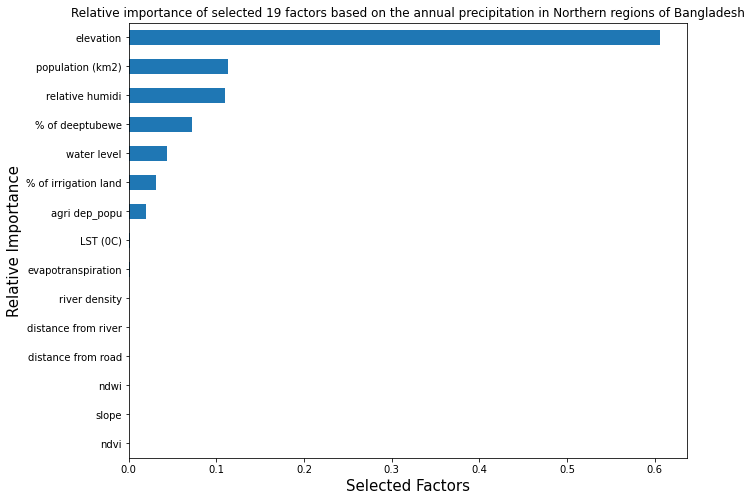

In [43]:
top4.plot(kind='barh',figsize=(10,8))
plt.xlabel("Selected Factors", size=15)
plt.ylabel("Relative Importance", size=15)
plt.title('Relative importance of selected 19 factors based on the annual precipitation in Northern regions of Bangladesh')

# Accuracy

In [44]:
gbr.score(xtest, ytest)

0.9552045502894978